#Inferential Statistics (Part 4)

In [1]:
# import necessary libraries
import numpy as np
import scipy.stats as stats

## Sample data & descriptive statistics

In [2]:
# Sample data
data = np.array([5, 17, 11, 21, 32, 33, 29, 50, 40, 37])

In [3]:
# Calculate descriptive statistics
sample_size = len(data)
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)  ## for sample data, use n-1

In [4]:
print("\nSample data: ", data)
print("\nSample size = ", sample_size)
print("\nSample mean = ", sample_mean)
print("\nSample SD = ", sample_std)


Sample data:  [ 5 17 11 21 32 33 29 50 40 37]

Sample size =  10

Sample mean =  27.5

Sample SD =  13.890444357343089


## Confidence Interval

In [5]:
## CI using t-distribution

# Set the confidence level (e.g., 95% confidence)
confidence_level = 0.95

# Calculate the critical value from the t-distribution. For large sample sizes, you can use the Z-score instead
t_critical = stats.t.ppf((1 + confidence_level) / 2, df=sample_size - 1)
print("\nCritical Value: ", t_critical)

# Calculate margin of error
margin_of_error = t_critical * (sample_std / np.sqrt(sample_size))

# Calculate the confidence interval
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print("\nConfidence Interval:", confidence_interval)


Critical Value:  2.2621571628540993

Confidence Interval: (np.float64(17.563374701727852), np.float64(37.43662529827215))


### TODO Task: interpret the above CI around the mean.

In [6]:
## CI using z-distribution

confidenceLevel = 0.95
numOfTails      = 2
alpha           = (1 - confidenceLevel)/numOfTails
z_critical      = stats.norm.ppf(1 - alpha)

## TODO Task: calculate CI and interpret

# Statistical Significance Testing

## a. Z-test

In [7]:
# Sample data
sample_data = [80, 85, 90, 70, 78, 82, 88, 75, 72, 77]

# Known population parameters
population_mean = 75
population_stddev = 10

In [8]:
# Calculate sample mean and size
sample_mean = np.mean(sample_data)
sample_size = len(sample_data)

# Calculate z-test statistic
z_test_statistic = (sample_mean - population_mean) / (population_stddev / np.sqrt(sample_size))

# significance level (alpha)
alpha = 0.05

# Calculate critical z-value for a two-tailed test
critical_z = stats.norm.ppf(1 - alpha / 2)

### TODO Task: State the decision rule

## b. T-test (one sample)

One-sample:
If just one group is being compared to a standard value (for example, sample students scores are compared to a class average), use a one-sample T-Test.

In [9]:
# Sample data
sample_data = [80, 85, 90, 70, 78, 82, 88, 75, 72, 77]

# Known population parameters
population_mean = 75

## population std is unknown in t-test

In [10]:
# Calculate sample mean, standard deviation, and size
sample_mean = np.mean(sample_data)
sample_stddev = np.std(sample_data, ddof=1)
sample_size = len(sample_data)

t_statistic, p_value = stats.ttest_1samp(sample_data, population_mean)

# significance level (alpha)
alpha = 0.05

### TODO Task: State the decision rule

## c. T-test (two sample)

Two-sample:
If the groups are from two distinct populations (for example, two different courses scores or two different class students), use a two-sample t test (also known as an "independent T-Test").

In [11]:
group1_scores = [80, 85, 90, 70, 78]
group2_scores = [82, 88, 75, 72, 77]

t_statistic, p_value = stats.ttest_ind(group1_scores, group2_scores)

# significance level (alpha)
alpha = 0.05

### TODO Task: State the decision rule

## d. T-test (paired samples)

Paired Sample T-Test:
If the groups are from the same population (for example, measuring before and after an experimental treatment), use a paired t test. This is a design containing within-subjects.

## e. ANOVA test

It compares the means of two or more groups to see whether there are any statistically significant differences.

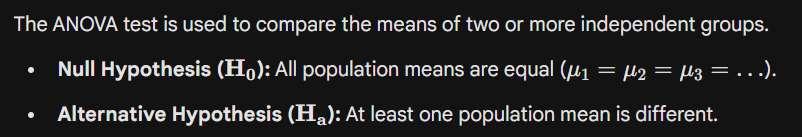

In [17]:
group_a = [30, 35, 40, 45, 50]
group_b = [25, 28, 32, 36, 40]
group_c = [20, 22, 25, 28, 30]

# Perform One-Way ANOVA Test
f_statistic, p_value = stats.f_oneway(group_a, group_b, group_c)

alpha = 0.05
print("F-Statistic : ", f_statistic)
print("P-Value : ", p_value)

F-Statistic :  7.296456352636124
P-Value :  0.008442907450143596


### TODO Task: State the decision rule

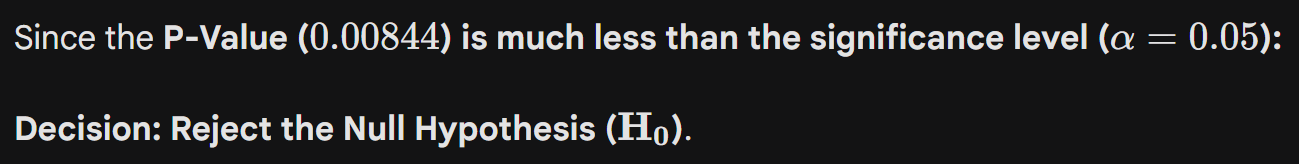

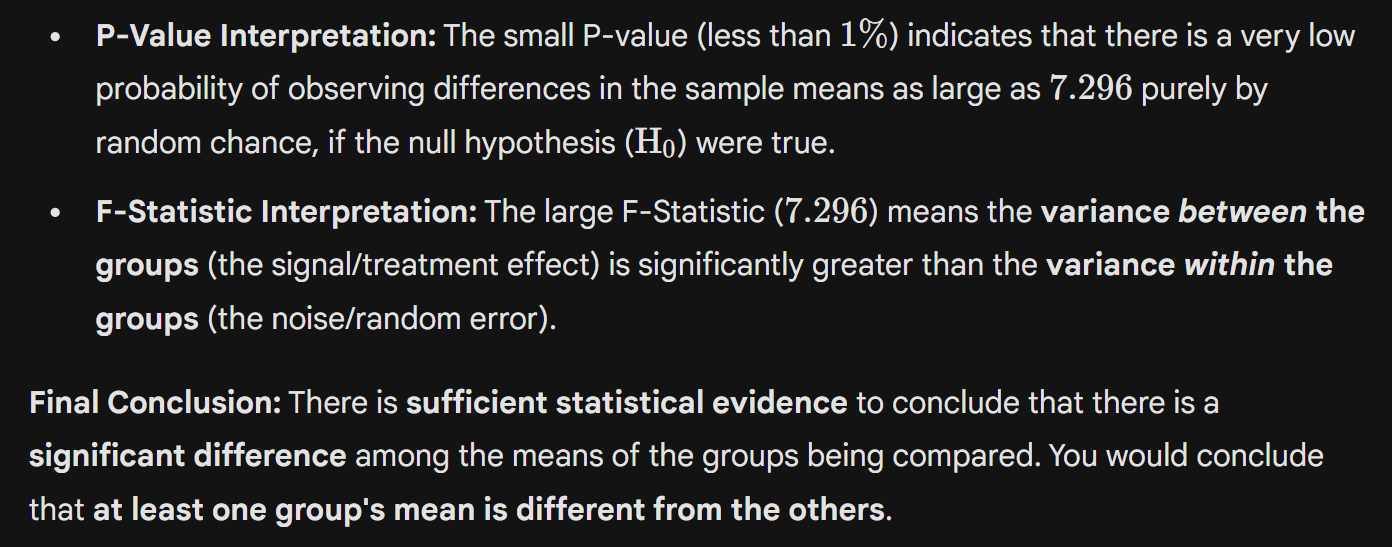

## f. Chi-squre test (goodness of fit)

It compares the observed frequency distribution of data with the expected frequency distribution, assuming that there is no association between the variables.

- Null Hypothesis ($\mathbf{H_0}$): The observed distribution of the sample data fits the expected distribution (i.e., there is no significant difference)
- Alternative Hypothesis ($\mathbf{H_a}$): The observed distribution does not fit the expected distribution (i.e., there is a significant difference).

In [13]:
# Observed frequencies
observed_freq = [15, 20, 25]

# Expected frequencies (assuming no association)
expected_freq = [20, 20, 20]

In [22]:
# Perform Chi-Square Test
chi2_stat, p_value = stats.chisquare(observed_freq, expected_freq)

print("Chi-Square Statistic:", chi2_stat)
print("p-value:", p_value)

Chi-Square Statistic: 2.5
p-value: 0.2865047968601901


Manual calculations:

In [15]:
names = ['Alice', 'Bob', 'Charlie']
ages = [25, 30, 35]
salaries = [50000, 60000, 75000]

print("--- Using zip() for Parallel Iteration ---")
for name, age, salary in zip(names, ages, salaries):
    print(f"Name: {name}, Age: {age}, Salary: ${salary}")

--- Using zip() for Parallel Iteration ---
Name: Alice, Age: 25, Salary: $50000
Name: Bob, Age: 30, Salary: $60000
Name: Charlie, Age: 35, Salary: $75000


### TODO Task: State the decision rule

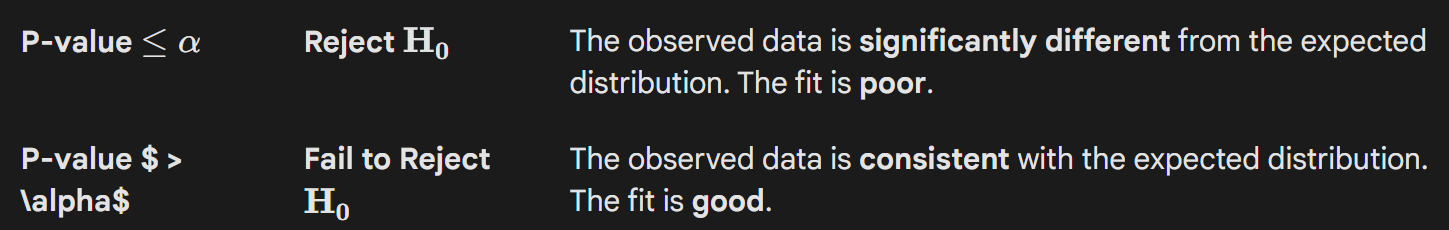

## g. Chi-square test (test of independence)

In [18]:
import pandas as pd
from scipy.stats import chi2_contingency

# --- 1. Create the Observed Data (Contingency Table) ---
# The data shows the actual count of customers in each Region/Status combination.

data = {
    'Purchase_Yes': [120, 90, 150, 100],  # Observed counts for Yes
    'Purchase_No': [80, 110, 50, 100]     # Observed counts for No
}
index = ['North', 'South', 'East', 'West']

# Create a Pandas DataFrame representing the Contingency Table
df_contingency = pd.DataFrame(data, index=index)

print("--- Observed Contingency Table ---")
print(df_contingency)
print("-" * 35)

--- Observed Contingency Table ---
       Purchase_Yes  Purchase_No
North           120           80
South            90          110
East            150           50
West            100          100
-----------------------------------


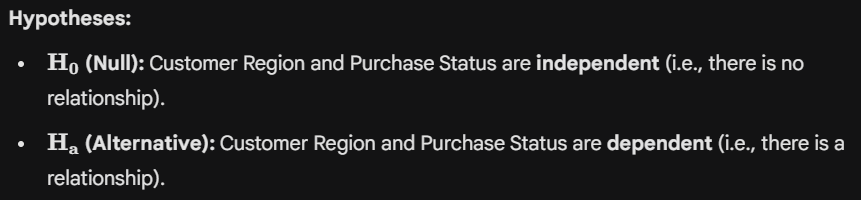

In [19]:
# --- 2. Perform the Chi-Square Test ---
# chi2_contingency returns four values:
# 1. chi2 (The test statistic)
# 2. p (The p-value)
# 3. dof (Degrees of freedom)
# 4. expected (The expected frequency table)

chi2, p_value, dof, expected = chi2_contingency(df_contingency)

# --- 3. Output Results ---
alpha = 0.05

print(f"Chi-Square Test Statistic (χ²): {chi2:.3f}")
print(f"P-value: {p_value:.5f}")
print(f"Degrees of Freedom (dof): {dof}")
print(f"Significance Level (α): {alpha}")
print("-" * 35)

print("--- Expected Frequency Table (What we'd expect if H₀ were true) ---")
# Convert numpy array to DataFrame for clean printing
df_expected = pd.DataFrame(expected.round(2), columns=df_contingency.columns, index=df_contingency.index)
print(df_expected)

Chi-Square Test Statistic (χ²): 42.967
P-value: 0.00000
Degrees of Freedom (dof): 3
Significance Level (α): 0.05
-----------------------------------
--- Expected Frequency Table (What we'd expect if H₀ were true) ---
       Purchase_Yes  Purchase_No
North         115.0         85.0
South         115.0         85.0
East          115.0         85.0
West          115.0         85.0


### TODO Task: State the decision rule

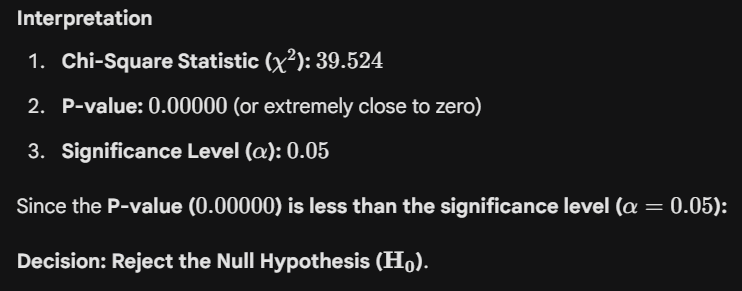

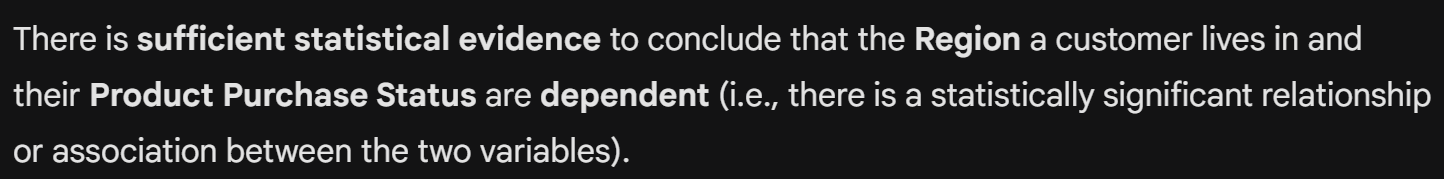